# Inference plots - Posterior model-predicted time series

This example extends from the inference-adaptive-covariance-mcmc: https://github.com/pints-team/pints/blob/master/examples/inference-adaptive-covariance-mcmc.ipynb, and shows you different way to plot the results of an MCMC routine.

Inference plots
* Trace plots
* Pairwise scatterplots
* Autocorrelation plot
* __Posterior model-predicted time series__


## Basic MCMC setup

The same setup used in the inference-adaptive-covariance-mcmc example.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_likelihood = pints.BayesianLogLikelihood(prior, log_likelihood)

# Run an adaptive mcmc routine
x0 = real_parameters * 1.2
mcmc = pints.AdaptiveCovarianceMCMC(log_likelihood, x0)
mcmc.set_verbose(False)


## Original data

Have a look again what does the original time series (to be fitted) look like.

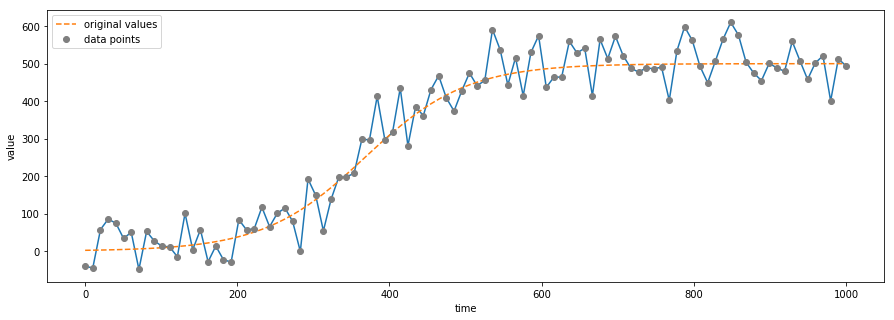

In [2]:
pl.figure(figsize=(15, 5))
pl.plot(times, values)
pl.plot(times, org_values, '--', c='tab:orange', label='original values')
pl.plot(times, values, 'o', c='tab:grey', label='data points')
pl.legend()
pl.xlabel('time')
pl.ylabel('value')
pl.show()


## Posterior model-predicted time series

It is generally a good idea to compare the posterior model-predicted time series with the observed data. That is, use each sampled parameters from the posterior (the MCMC chain) to make the prediction of the time series.


Running
Done!


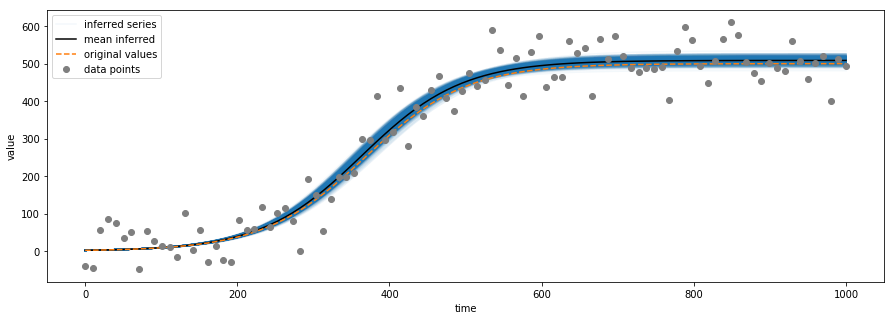

In [3]:
# MCMC setup for burn in and thinning
mcmc.set_burn_in(3000)
mcmc.set_thinning_rate(4)

print('Running')
chain = mcmc.run()
print('Done!')

# Evaluate the model for all inferred parameters
new_values = []
for params in chain:
    new_values.append(problem.evaluate(params[:2]))
new_values = np.array(new_values)
mean_values = np.mean(new_values, axis=0)

# Plot them
pl.figure(figsize=(15, 5))
pl.plot(times, new_values[0], color='tab:blue', alpha=0.05, label='inferred series')
for v in new_values[1:]:
    pl.plot(times, v, color='tab:blue', alpha=0.05)
pl.plot(times, mean_values, c='black', label='mean inferred')
pl.plot(times, org_values, '--', c='tab:orange', label='original values')
pl.plot(times, values, 'o', c='tab:grey', label='data points')
pl.legend()
pl.xlabel('time')
pl.ylabel('value')
pl.show()